# TEAM 5 - Videogames Dataset 

***By: Limei Huang, Kwangwoo Kim, Huaiping Wang, Fucheng Yao, and Eman Nagib***

**Data set: Video Game Sales - link: https://www.kaggle.com/gregorut/videogamesales**
 
Data set description: video games with sales greater than 100,000 copies since the year 1980 to 2016.
The data set includes the following fields:
>        1.Rank: Ranking of overall sales
>        2.Name: The games name
>        3.Platform: Platform of the games release (i.e. PC,PS4, etc.)
>        4.Year: Year of the game's release
>        5.Genre: Genre of the game
>        6.Publisher: Publisher of the game
>        7.NA_Sales: Sales in North America (in millions)
>        8.EU_Sales: Sales in Europe (in millions)
>        9.JP_Sales: Sales in Japan (in millions)
>        10.Other_Sales: Sales in the rest of the world (in millions)
>        11.Global_Sales: Total worldwide sales (in millions)

## **CLEANING OUR DATA**

In [27]:
%%bq query
CREATE OR REPLACE table `team-5-770.Kaggle_videogames.Kaggle_videogames1` as 
SELECT * 
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames`
WHERE 
Rank IS NOT NULL
AND Name IS NOT NULL
AND Platform IS NOT NULL
AND Year IS NOT NULL
AND Genre IS NOT NULL
AND Publisher IS NOT NULL
AND NA_Sales IS NOT NULL
AND EU_Sales IS NOT NULL
AND JP_Sales IS NOT NULL
AND Other_Sales IS NOT NULL
AND Global_Sales IS NOT NULL
AND Year <> "2020"
AND Year <> "2017"
AND Year <> "N/A" 
AND Publisher <> "N/A"
AND Publisher <> "Unknown"

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6060,"Sakura Wars 4: Koi Seyo,Otome",DC,2002,Adventure,Sega,0.0,0.0,0.29,0.0,0.29
13069,The Typing of the Dead,DC,2000,Shooter,Sega,0.0,0.0,0.05,0.0,0.05
5537,Sakura Wars 3: Paris wa Moeteiru ka,DC,2001,Adventure,Sega,0.0,0.0,0.33,0.0,0.33
9844,Sonic Adventure 2,DC,2001,Platform,Sega,0.0,0.0,0.12,0.0,0.12
10540,Blue Stinger,DC,1999,Adventure,Activision,0.0,0.0,0.1,0.0,0.1
9166,Dead or Alive 2,DC,2000,Fighting,Acclaim Entertainment,0.0,0.0,0.14,0.0,0.14
13960,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,NEC Interchannel,0.0,0.0,0.04,0.0,0.04
12816,Jikkyou Powerful Pro Yakyuu DreamCast Edition,DC,2000,Sports,Konami Digital Entertainment,0.0,0.0,0.06,0.0,0.06
9674,Capcom vs. SNK 2: Millionaire Fighting 2001,DC,2001,Fighting,Capcom,0.0,0.0,0.12,0.0,0.12
6452,The House of the Dead 2,DC,1998,Shooter,Sega,0.0,0.0,0.26,0.0,0.26


In [29]:
%%bq query
SELECT count(*)
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames1`

f0_
16187


In [31]:
%%bq query
CREATE OR REPLACE table `team-5-770.Kaggle_videogames.Kaggle_videogames2` as
SELECT Rank, Name, Platform, CAST(Year AS INT64) as Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, GLobal_Sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames1` ;

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,GLobal_Sales
6452,The House of the Dead 2,DC,1998,Shooter,Sega,0.0,0.0,0.26,0.0,0.26
5699,Virtua Striker 2,DC,1999,Sports,Sega,0.0,0.0,0.32,0.0,0.32
10655,Marvel vs. Capcom: Clash of Super Heroes,DC,1999,Fighting,Capcom,0.0,0.0,0.1,0.0,0.1
12063,Crazy Taxi 2,DC,2001,Racing,Sega,0.0,0.0,0.07,0.0,0.07
5359,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.0,0.0,0.34,0.0,0.34
6986,Pro Yakyuu Team o Tsukurou!,DC,1999,Sports,Sega,0.0,0.0,0.23,0.0,0.23
12274,Kanon,DC,2000,Adventure,NEC Interchannel,0.0,0.0,0.06,0.0,0.06
15902,Triggerheart Exelica,DC,2007,Shooter,Warashi,0.0,0.0,0.02,0.0,0.02
11293,Derby Tsuku: Derby Uma o Tsukurou!,DC,2000,Sports,Sega,0.0,0.0,0.08,0.0,0.08
9166,Dead or Alive 2,DC,2000,Fighting,Acclaim Entertainment,0.0,0.0,0.14,0.0,0.14


In [4]:
%%bq query
SELECT *
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
ORDER BY RANK
LIMIT 5

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,GLobal_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


### <span style="color:RED"> 1. What publishers, platforms, and games generated the highest revenue?

 **1.1 Highest Revenue Generating Publishers:** <span style="color:GREEN">Top 3: Nintendo, Electronic Arts, and Activision 
    
>    Suprisingly, there is no obvious correlation between the number of platforms and the revnue generated. 
>    A publisher can have its game run on fewer but more dominating platforms and genearte higher revneue such as games run on PS4. </span>

In [32]:
%%bq query
SELECT Publisher, 
  SUM(Global_Sales) as Total_Sales,
  COUNT(DISTINCT platform) AS NumberOfPlatforms, 
  STRING_AGG(DISTINCT Platform, " - " ORDER BY Platform) AS Platforms
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Publisher
ORDER BY Total_Sales DESC, NumberOfPlatforms 
LIMIT 10

Publisher,Total_Sales,NumberOfPlatforms,Platforms
Nintendo,1784.43,10,3DS - DS - GB - GBA - GC - N64 - NES - SNES - Wii - WiiU
Electronic Arts,1093.39,19,3DS - DS - GB - GBA - GC - N64 - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - SAT - Wii - WiiU - X360 - XB - XOne
Activision,721.41,20,2600 - 3DS - DC - DS - GB - GBA - GC - N64 - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - Wii - WiiU - X360 - XB - XOne
Sony Computer Entertainment,607.28,6,PS - PS2 - PS3 - PS4 - PSP - PSV
Ubisoft,473.25,19,3DS - DC - DS - GB - GBA - GC - N64 - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - Wii - WiiU - X360 - XB - XOne
Take-Two Interactive,399.3,17,3DS - DS - GBA - GC - N64 - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - Wii - WiiU - X360 - XB - XOne
THQ,340.44,15,3DS - DS - GBA - GC - N64 - PC - PS - PS2 - PS3 - PSP - SNES - Wii - WiiU - X360 - XB
Konami Digital Entertainment,278.56,23,3DO - 3DS - DC - DS - GB - GBA - GC - GEN - N64 - NES - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - SAT - SNES - Wii - X360 - XB - XOne
Sega,270.66,21,2600 - 3DS - DC - DS - GBA - GC - GEN - GG - PC - PS2 - PS3 - PS4 - PSP - PSV - SAT - SCD - Wii - WiiU - X360 - XB - XOne
Namco Bandai Games,253.65,23,3DS - DC - DS - GB - GBA - GC - N64 - NES - PC - PS - PS2 - PS3 - PS4 - PSP - PSV - SAT - SNES - WS - Wii - WiiU - X360 - XB - XOne


>> **1.1.1. For the top 3 publishers what are the most profitable platforms?**

In [33]:
%%bq query
SELECT *
FROM(
SELECT  Publisher , Platform,
SUM(Global_Sales) AS sum_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Publisher , Platform
ORDER BY sum_sales DESC)
WHERE Publisher = "Nintendo" LIMIT 3

Publisher,Platform,sum_sales
Nintendo,Wii,390.34
Nintendo,DS,349.1
Nintendo,GB,229.06


In [34]:
%%bq query
SELECT *
FROM(
SELECT  Publisher , Platform ,
SUM(Global_Sales) AS sum_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Publisher , Platform
ORDER BY sum_sales DESC)
WHERE Publisher = "Electronic Arts" LIMIT 3

Publisher,Platform,sum_sales
Electronic Arts,PS2,245.96
Electronic Arts,X360,177.97
Electronic Arts,PS3,167.09


In [35]:
%%bq query
SELECT *
FROM(
SELECT  Publisher , Platform ,
SUM(Global_Sales) AS sum_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Publisher , Platform
ORDER BY sum_sales DESC)
WHERE Publisher = "Activision" LIMIT 3

Publisher,Platform,sum_sales
Activision,X360,158.75
Activision,PS3,126.39
Activision,PS2,85.59


**1.2. Highest Revenue Generating Gaming Platforms:** <span style="color:GREEN"> Top 3: PS2, X360, and PS3.  </span>

> North America sales seems to account for the highest percentage of total global sales followed by European sales.



In [36]:
%%bq query
SELECT Platform,
  SUM(NA_Sales) as Total_NA_Sales, 
  SUM(EU_Sales) as Total_EU_Sales, 
  SUM(JP_Sales) as Total_JP_Sales, 
  SUM(Other_Sales) as Total_Other_Sales,
  SUM(Global_Sales) as Total_Sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Platform
ORDER BY Total_Sales DESC 
LIMIT 10

Platform,Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales,Total_Sales
PS2,572.18,331.5,137.08,190.02,1230.69
X360,593.71,277.83,12.25,84.6,968.7
PS3,388.14,340.31,78.89,140.71,948.01
Wii,497.0,264.01,68.28,79.14,909.03
DS,387.75,193.7,174.77,60.22,817.44
PS,334.17,212.02,139.78,40.63,726.42
GBA,177.51,72.14,46.5,7.49,304.29
PSP,107.09,67.16,73.98,41.52,289.8
PS4,96.75,123.68,14.27,43.35,277.99
GB,113.64,47.51,85.12,8.16,254.42


 
**1.3. Highest Revenue Generating Gaming Genres:** <span style="color:GREEN"> Top 3: Action, Sports, and Shooter.</span>

> North America sales seems to account for the highest percentage of total global sales followed by European sales. However, Japan sales account for the highest percentage of total global sales for the Role-Playing games.


In [37]:
%%bq query
SELECT Genre,
  SUM(NA_Sales) as Total_NA_Sales, 
  SUM(EU_Sales) as Total_EU_Sales, 
  SUM(JP_Sales) as Total_JP_Sales, 
  SUM(Other_Sales) as Total_Other_Sales,
  SUM(Global_Sales) as Total_Sales
  #COUNT(DISTINCT platform) AS NumberOfPlatforms, 
  #STRING_AGG(DISTINCT Platform, " - " ORDER BY Platform LIMIT 10) AS Platforms
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Genre
ORDER BY Total_Sales DESC 
LIMIT 10

Genre,Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales,Total_Sales
Action,860.51,515.88,157.66,184.85,1719.91
Sports,669.2,371.27,134.76,132.52,1308.13
Shooter,574.95,310.42,38.18,101.89,1025.94
Role-Playing,325.2,187.11,348.91,59.19,920.52
Platform,445.89,200.47,130.65,51.49,828.84
Misc,395.83,211.05,106.58,73.75,787.79
Racing,356.85,235.19,56.19,76.34,724.81
Fighting,220.74,100.0,87.11,36.19,444.01
Simulation,181.48,112.92,63.54,31.33,389.54
Puzzle,121.75,50.28,56.62,12.45,241.63


 
**1.4. Highest Revenue Generating Games:** <span style="color:GREEN"> Top 3: Wii Sports, Grand Theft Auto V, and Super Mario Bros.</span>

> North America sales seems to account for the highest percentage of total global sales followed by European sales. However, European sales and North American sales seem to account for similar percentages of total global sales for the Grand Theft Auto V game. 
>
> There are some distinct discrepencies in regional sales of particular games such as Call of Duty.


In [38]:
%%bq query
SELECT Name,
  SUM(NA_Sales) as Total_NA_Sales, 
  SUM(EU_Sales) as Total_EU_Sales, 
  SUM(JP_Sales) as Total_JP_Sales, 
  SUM(Other_Sales) as Total_Other_Sales,
  SUM(Global_Sales) as Total_Sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Name
ORDER BY Total_Sales DESC 
LIMIT 10

Name,Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales,Total_Sales
Wii Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
Tetris,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,15.75,11.01,3.28,2.96,33.0
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.0,31.37
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
New Super Mario Bros.,11.38,9.23,6.5,2.9,30.01
Call of Duty: Black Ops II,14.08,11.05,0.72,3.88,29.72


### <span style="color:RED">2. Are there any overarching trends over the past ~30 years?

**2.1. Does the genre influence the choice of platform?**
>
> Every Genre has a preffered choice of platform, however, DS seems to be the prefered choice of platform for multiple genres.

In [9]:
%%bq query -n z
WITH count AS(
SELECT Genre, Platform, COUNT(Platform) AS p_count
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
GROUP BY Genre, Platform
ORDER BY Genre, p_count DESC)

SELECT Genre, Platform, p_count
FROM count
WHERE p_count = (SELECT MAX(p_count) FROM count AS m WHERE m.Genre = count.Genre)
ORDER BY p_count DESC

In [11]:
%%chart sankey --data z
height: 400
width: 1300

**2.2. What are the top 5 video game's genres?**
> Top 5 genres: Action, Sports, Misc, Role-Playing, Shooter

In [40]:
%%bq query -n e
SELECT Genre, count(Genre) as Genre_count
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
group by Genre
order by Genre_count desc
limit 5

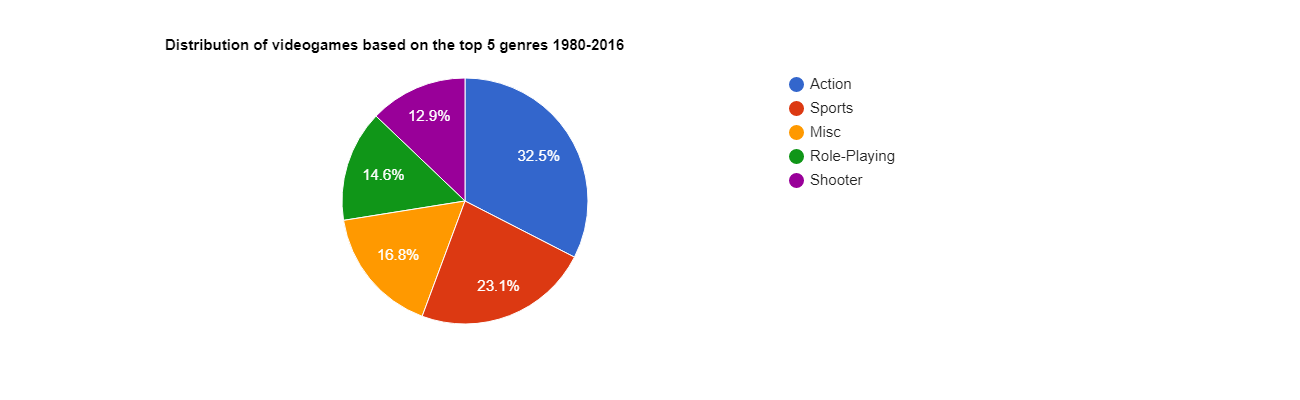

In [41]:
%%chart pie --data e
title: "Distribution of videogames based on the top 5 genres 1980-2016"
height: 400
width: 1300


**2.3. What is the most used platform by video games?**
> Top 5 platforms: DS, PS2, PS3, Wii, X360

In [5]:
%%bq query -n c
SELECT Platform, count(Platform) as P_count
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
Group by Platform
Order by P_count desc
LIMIT 10


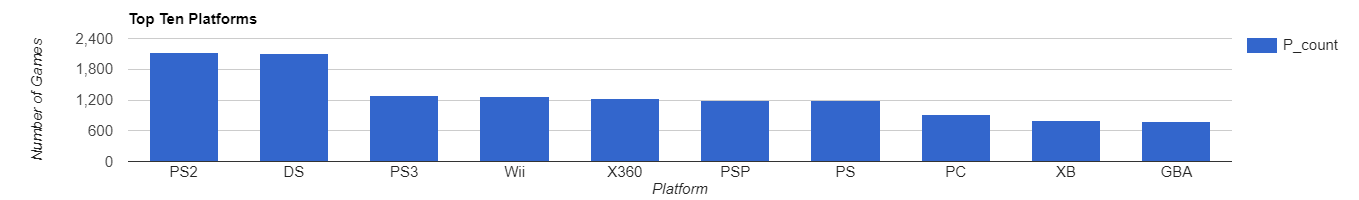

In [7]:
%%chart columns  --data c
title: "Top Ten Platforms"
hAxis:
  title: "Platform" 
vAxis:
  title: "Number of Games"
legend: 

**2.4. When did the number of publishers in the gaming industry reach its peak?**
>
> Number of publisher in game industry reached its peak from 2008-2009 as well as the global sales.

In [19]:
%%bq query -n q 
select a.Year, a.count_name
,a.sum_global_sales
from
(SELECT Year, count(name) count_name, round(sum(GLOBAL_Sales) ,2) sum_global_sales, round(sum(na_Sales) ,2) na_global_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null 
group by Year
order by Year
) a  

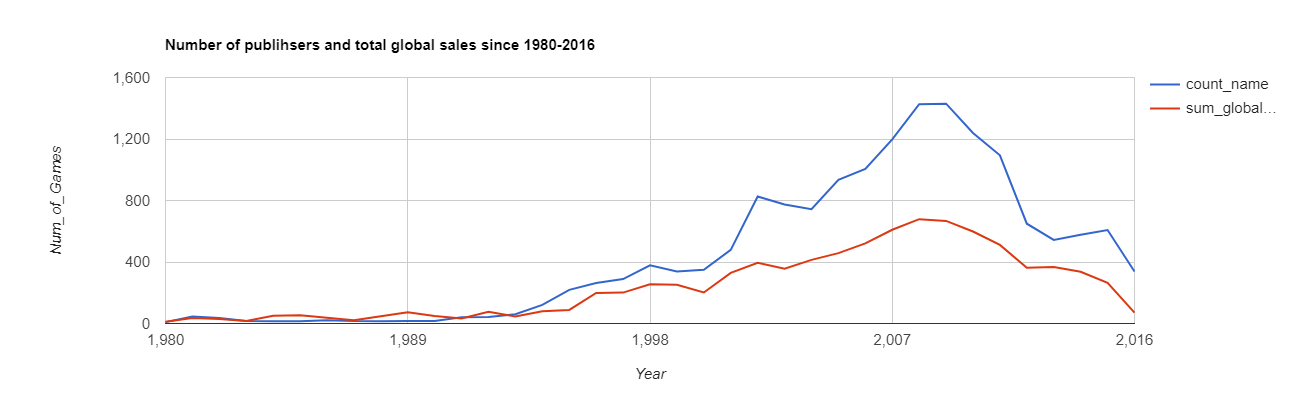

In [21]:
%%chart combo --data q
title: "Number of publihsers and total global sales since 1980-2016"
height: 400
width: 1300
hAxis:
  title: Year
vAxis:
  title: Num_of_Games
legend: 


**2.5. Are there any trends concerning how much each region accounts of the global sales?**
>
> We see that over time NA starts to acount for a lesser percentage of global sales as JP, EU, and other regions start increasing in the percentage of sales.


In [50]:
%%bq query 
select a.Year,
round((a.na_global_sales / a.sum_global_sales),2) na_percentage,
round((a.eu_global_sales / a.sum_global_sales),2) eu_percentage,
round((a.jp_global_sales / a.sum_global_sales),2) jp_percentage,
round((a.other_global_sales / a.sum_global_sales),2) other_percentage,
round((a.sum_global_sales / a.sum_global_sales),2) Global_percentage,
 a.sum_global_sales
from
(SELECT Year, count(Publisher) count_publisher, round(sum(GLOBAL_Sales) ,2) sum_global_sales, round(sum(na_Sales) ,2) na_global_sales, 
  round(sum(eu_Sales) ,2) eu_global_sales, round(sum(jp_Sales) ,2) jp_global_sales, round(sum(other_Sales) ,2) other_global_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null 
group by Year
order by Year
) a

Year,na_percentage,eu_percentage,jp_percentage,other_percentage,Global_percentage,sum_global_sales
1980,0.93,0.06,0.0,0.01,1.0,11.38
1981,0.93,0.05,0.0,0.01,1.0,35.48
1982,0.93,0.06,0.0,0.01,1.0,28.86
1983,0.46,0.05,0.48,0.01,1.0,16.79
1984,0.66,0.04,0.28,0.01,1.0,50.36
1985,0.63,0.09,0.27,0.02,1.0,53.94
1986,0.34,0.08,0.53,0.05,1.0,37.07
1987,0.39,0.06,0.53,0.01,1.0,21.74
1988,0.51,0.14,0.33,0.02,1.0,47.22
1989,0.61,0.11,0.25,0.02,1.0,73.45


In [51]:
%%bq query -n d
select a.Year,
round((a.na_global_sales / a.sum_global_sales),2) na_percentage,
round((a.eu_global_sales / a.sum_global_sales),2) eu_percentage,
round((a.jp_global_sales / a.sum_global_sales),2) jp_percentage,
round((a.other_global_sales / a.sum_global_sales),2) other_percentage
from
(SELECT Year, count(Publisher) count_publisher, round(sum(GLOBAL_Sales) ,2) sum_global_sales, round(sum(na_Sales) ,2) na_global_sales, 
  round(sum(eu_Sales) ,2) eu_global_sales, round(sum(jp_Sales) ,2) jp_global_sales, round(sum(other_Sales) ,2) other_global_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null 
group by Year
order by Year
) a

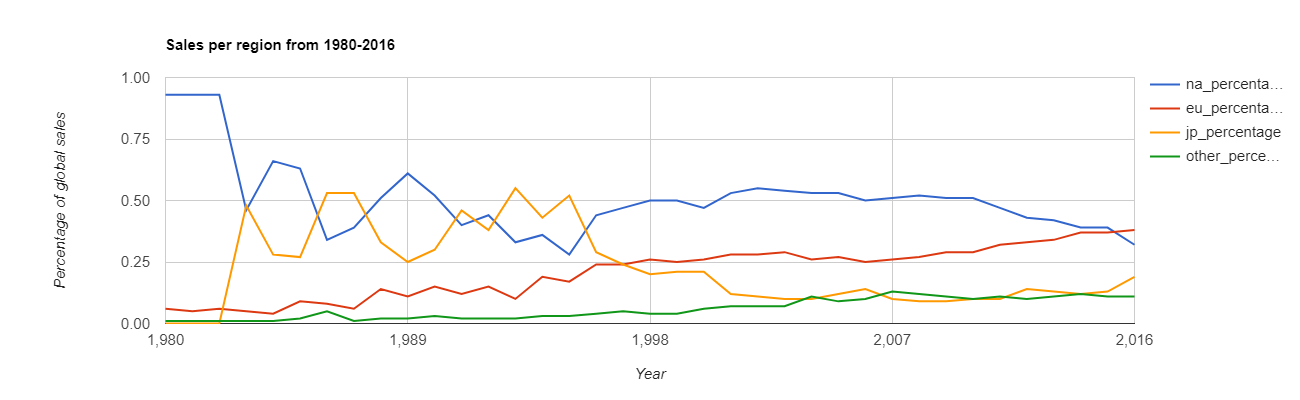

In [52]:
%%chart line --data d
title: "Sales per region from 1980-2016"
height: 400
width: 1300
hAxis:
  title: Year
vAxis:
  title: "Percentage of global sales"
legend: 


### <span style="color:RED"> 3. What platforms, publishers, and genres seem to be popular at certain periods of time from 1980-2016 ?


**3.1. What is the most revenue generating genre for videogame publishers in each 5-year bin?**
>
>Platform and Puzzle were popular but Action and Shooter games dominate the gaming industry due to development of graphic and 3D technology

In [56]:
%%bq query -n b 
select * from 
(select Year_Bin,
        Genre, sum_global_sales,
        ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_global_sales DESC) AS rank
from 
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985" 
            when Year is not null and (year>=1986 and year<=1990) then "1986-1990"  
            when Year is not null and (year>=1991 and year<=1995) then "1991-1995" 
            when Year is not null and (year>=1996 and year<=2000) then "1996-2000" 
            when Year is not null and (year>=2001 and year<=2005) then "2001-2005" 
            when Year is not null and (year>=2006 and year<=2010) then "2006-2010" 
            when Year is not null and (year>=2011 and year<=2016) then "2011-2016" 
            else NULL end Year_Bin, 
Genre, round(sum(GLOBAL_Sales) ,2) sum_global_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null
group by Year_Bin,Genre
order by Year_Bin, sum_global_sales desc
) 
)
where rank <=1

In [57]:
%%chart sankey  --data b
height: 500
width: 1300


**3.2. Top revenue generating video games for each year**

> Publisher Trend: Nintendo seems to be consistently popular

> Genre Trend: Action, Sports, and Shooter are genres that seem to be poupular time and time again. 




In [60]:
%%bq query
SELECT year, Publisher, Platform, Genre, Name, global_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`  AS a
WHERE global_sales = (SELECT MAX(global_sales) FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`  AS m WHERE m.year = a.year)
ORDER BY year DESC, Publisher, Platform, Genre, Name

year,Publisher,Platform,Genre,Name,global_sales
2016,Electronic Arts,PS4,Sports,FIFA 17,4.77
2015,Activision,PS4,Shooter,Call of Duty: Black Ops 3,14.24
2014,Take-Two Interactive,PS4,Action,Grand Theft Auto V,11.98
2013,Take-Two Interactive,PS3,Action,Grand Theft Auto V,21.4
2012,Activision,PS3,Shooter,Call of Duty: Black Ops II,14.03
2011,Activision,X360,Shooter,Call of Duty: Modern Warfare 3,14.76
2010,Microsoft Game Studios,X360,Misc,Kinect Adventures!,21.82
2009,Nintendo,Wii,Sports,Wii Sports Resort,33.0
2008,Nintendo,Wii,Racing,Mario Kart Wii,35.82
2007,Nintendo,Wii,Sports,Wii Fit,22.72


**3.3. Which Platform generated the highest revenue in each 5-year bin?**
>
>Portable gaming device has become less pupular. PS4,Xbox are now much more pupular.


In [61]:
%%bq query 
select *
from 
(select Year_Bin,
        Platform, sum_global_sales,
        ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_global_sales DESC) AS rank
from 
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985" 
            when Year is not null and (year>=1986 and year<=1990) then "1986-1990"  
            when Year is not null and (year>=1991 and year<=1995) then "1991-1995" 
            when Year is not null and (year>=1996 and year<=2000) then "1996-2000" 
            when Year is not null and (year>=2001 and year<=2005) then "2001-2005" 
            when Year is not null and (year>=2006 and year<=2010) then "2006-2010" 
            when Year is not null and (year>=2011 and year<=2016) then "2011-2016" 
            else NULL end Year_Bin, 
Platform, round(sum(GLOBAL_Sales) ,2) sum_global_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null
group by Year_Bin,Platform
order by Year_Bin,sum_global_sales desc
) 
)
where rank <=1

Year_Bin,Platform,sum_global_sales,rank
1980-1985,NES,114.49,1
1986-1990,NES,124.77,1
1991-1995,SNES,156.49,1
1996-2000,PS,640.36,1
2001-2005,PS2,925.82,1
2006-2010,Wii,808.79,1
2011-2016,PS3,457.06,1


### <span style="color:RED">4. Highest revenue generating platforms and genres over the past ~30 years for particular regions?

**4.1. Platform by region:**

In [30]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.Other_Platform` as
select * from
(select Year_Bin,
       Platform, sum_Other_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_Other_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Platform, round(sum(Other_Sales) ,2) sum_Other_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2` 
where year is not null
group by Year_Bin,Platform
order by Year_Bin, sum_Other_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Platform,sum_Other_sales,rank
1980-1985,NES,1.69,1
1986-1990,NES,3.37,1
1991-1995,SNES,2.41,1
1996-2000,PS,35.61,1
2001-2005,PS2,117.74,1
2006-2010,PS3,71.36,1
2011-2016,PS3,69.35,1


In [31]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.JP_Platform` as
select * from
(select Year_Bin,
       Platform, sum_JP_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_JP_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Platform, round(sum(JP_Sales) ,2) sum_JP_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin,Platform
order by Year_Bin, sum_JP_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Platform,sum_JP_sales,rank
1980-1985,NES,36.91,1
1986-1990,NES,56.89,1
1991-1995,SNES,96.36,1
1996-2000,PS,122.07,1
2001-2005,PS2,92.32,1
2006-2010,DS,133.26,1
2011-2016,3DS,97.15,1


In [32]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.NA_Platform` as
select * from
(select Year_Bin,
       Platform, sum_NA_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_NA_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Platform, round(sum(NA_Sales) ,2) sum_NA_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin,Platform
order by Year_Bin, sum_NA_sales desc
)
)
where rank =1
ORDER BY Year_Bin

Year_Bin,Platform,sum_NA_sales,rank
1980-1985,2600,76.76,1
1986-1990,NES,51.68,1
1991-1995,SNES,43.86,1
1996-2000,PS,298.11,1
2001-2005,PS2,441.21,1
2006-2010,Wii,445.55,1
2011-2016,X360,225.2,1


In [33]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.EU_Platform` as
select * from
(select Year_Bin,
       Platform, sum_EU_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_EU_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Platform, round(sum(EU_Sales) ,2) sum_EU_sales
FROM `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin,Platform
order by Year_Bin, sum_EU_sales desc
)
)
where rank =1
Order by Year_Bin

Year_Bin,Platform,sum_EU_sales,rank
1980-1985,NES,7.23,1
1986-1990,NES,12.82,1
1991-1995,SNES,13.87,1
1996-2000,PS,184.63,1
2001-2005,PS2,274.58,1
2006-2010,Wii,232.6,1
2011-2016,PS3,171.96,1


**4.1. ANSWER**

In [91]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.Platform` as
select * from (
SELECT JP.Year_Bin, NA.Platform as NA_Platform, EU.Platform as EU_Platform, JP.Platform as JP_Platform,  Ot.Platform as Oth_Platform
FROM `team-5-770.videogame.JP_Platform` as JP
inner join
`team-5-770.videogame.Other_Platform` as Ot
on JP.Year_Bin = Ot.Year_Bin
inner join `team-5-770.videogame.NA_Platform` as NA
on Ot.Year_Bin = NA.Year_Bin
inner join `team-5-770.videogame.EU_Platform` as EU
on NA.Year_Bin = EU.Year_Bin
)
order by Year_Bin

Year_Bin,NA_Platform,EU_Platform,JP_Platform,Oth_Platform
1980-1985,2600,NES,NES,NES
1986-1990,NES,NES,NES,NES
1991-1995,SNES,SNES,SNES,SNES
1996-2000,PS,PS,PS,PS
2001-2005,PS2,PS2,PS2,PS2
2006-2010,Wii,Wii,DS,PS3
2011-2016,X360,PS3,3DS,PS3


**4.2. Genre by region:**

In [34]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.EU_Genre` as
select * from
(select Year_Bin,
       Genre, sum_EU_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_EU_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(EU_Sales) ,2) sum_EU_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_EU_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Genre,sum_EU_sales,rank
1980-1985,Platform,4.85,1
1986-1990,Platform,12.38,1
1991-1995,Platform,15.35,1
1996-2000,Action,47.16,1
2001-2005,Action,104.87,1
2006-2010,Sports,164.92,1
2011-2016,Action,200.23,1


In [35]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.NA_Genre` as
select * from
(select Year_Bin,
       Genre, sum_NA_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_NA_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(EU_Sales) ,2) sum_NA_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_NA_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Genre,sum_NA_sales,rank
1980-1985,Platform,4.85,1
1986-1990,Platform,12.38,1
1991-1995,Platform,15.35,1
1996-2000,Action,47.16,1
2001-2005,Action,104.87,1
2006-2010,Sports,164.92,1
2011-2016,Action,200.23,1


In [36]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.JP_Genre` as
select * from
(select Year_Bin,
       Genre, sum_JP_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_JP_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(JP_Sales) ,2) sum_JP_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_JP_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Genre,sum_JP_sales,rank
1980-1985,Platform,12.98,1
1986-1990,Platform,23.75,1
1991-1995,Role-Playing,34.21,1
1996-2000,Role-Playing,76.17,1
2001-2005,Role-Playing,55.53,1
2006-2010,Role-Playing,90.49,1
2011-2016,Role-Playing,75.41,1


In [37]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.Other_Genre` as
select * from
(select Year_Bin,
       Genre, sum_Other_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_Other_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(Other_Sales) ,2) sum_Other_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_Other_sales desc
)
)
where rank =1
order by Year_Bin

Year_Bin,Genre,sum_Other_sales,rank
1980-1985,Platform,1.02,1
1986-1990,Platform,1.78,1
1991-1995,Platform,2.79,1
1996-2000,Role-Playing,7.83,1
2001-2005,Action,40.06,1
2006-2010,Action,70.52,1
2011-2016,Action,65.52,1


In [26]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.EU_Genre` as
select * from
(select Year_Bin,
       Genre, sum_EU_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_EU_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(EU_Sales) ,2) sum_EU_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_EU_sales desc
)
)
where rank =1
Order by Year_Bin

Year_Bin,Genre,sum_EU_sales,rank
1980-1985,Platform,4.85,1
1986-1990,Platform,12.38,1
1991-1995,Platform,15.35,1
1996-2000,Action,47.16,1
2001-2005,Action,104.87,1
2006-2010,Sports,164.92,1
2011-2016,Action,200.23,1


In [25]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.EU_Genre` as
select * from
(select Year_Bin,
       Genre, sum_EU_sales,
       ROW_NUMBER() OVER (PARTITION BY Year_Bin ORDER BY sum_EU_sales DESC) AS rank
from
(
SELECT case when Year is not null and (year>=1980 and year<=1985) then "1980-1985"
           when Year is not null and (year>=1986 and year<=1990) then "1986-1990"
           when Year is not null and (year>=1991 and year<=1995) then "1991-1995"
           when Year is not null and (year>=1996 and year<=2000) then "1996-2000"
           when Year is not null and (year>=2001 and year<=2005) then "2001-2005"
           when Year is not null and (year>=2006 and year<=2010) then "2006-2010"
           when Year is not null and (year>=2011 and year<=2016) then "2011-2016"
           else NULL end Year_Bin,
Genre, round(sum(EU_Sales) ,2) sum_EU_sales
FROM  `team-5-770.Kaggle_videogames.Kaggle_videogames2`
where year is not null
group by Year_Bin, Genre
order by Year_Bin, sum_EU_sales desc
)
)
where rank =1
Order by Year_Bin

Year_Bin,Genre,sum_EU_sales,rank
1980-1985,Platform,4.85,1
1986-1990,Platform,12.38,1
1991-1995,Platform,15.35,1
1996-2000,Action,47.16,1
2001-2005,Action,104.87,1
2006-2010,Sports,164.92,1
2011-2016,Action,200.23,1


**4.2. ANSWER:**

In [87]:
%%bq query
create or replace table `team-5-770.Kaggle_videogames.Genre` as
select * from (
SELECT JP.Year_Bin, NA.Genre as NA_Genre, EU.Genre as EU_Genre, JP.Genre as JP_Genre,  Ot.Genre as Oth_Genre
FROM `team-5-770.Kaggle_videogames.JP_Genre` as JP
inner join
`team-5-770.Kaggle_videogames.Other_Genre` as Ot
on JP.Year_Bin = Ot.Year_Bin
inner join `team-5-770.Kaggle_videogames.NA_Genre` as NA
on Ot.Year_Bin = NA.Year_Bin
inner join `team-5-770.Kaggle_videogames.EU_Genre` as EU
on NA.Year_Bin = EU.Year_Bin
)
order by Year_Bin

Year_Bin,NA_Genre,EU_Genre,JP_Genre,Oth_Genre
1980-1985,Platform,Platform,Platform,Platform
1986-1990,Platform,Platform,Platform,Platform
1991-1995,Platform,Platform,Role-Playing,Platform
1996-2000,Action,Action,Role-Playing,Role-Playing
2001-2005,Action,Action,Role-Playing,Action
2006-2010,Sports,Sports,Role-Playing,Action
2011-2016,Action,Action,Role-Playing,Action
